In [1]:
import json
import os
import numpy as np
from PIL import Image, ImageDraw
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import mpld3
mpld3.enable_notebook()

In [2]:
ann_root = '/home/berkiu/work/datasets/funsd/dataset/testing_data/annotations'
img_root = '/home/berkiu/work/datasets/funsd/dataset/testing_data/images'

In [3]:
annotations_js = [os.path.join(ann_root, f) for f in os.listdir(ann_root)]
images = [os.path.join(img_root, f) for f in os.listdir(img_root)]

In [53]:
annotations

{'form': [{'box': [362, 304, 379, 315],
   'text': '17',
   'label': 'answer',
   'words': [{'box': [362, 304, 379, 315], 'text': '17'}],
   'linking': [[5, 0]],
   'id': 0},
  {'box': [446, 257, 461, 267],
   'text': 'cc:',
   'label': 'question',
   'words': [{'box': [446, 257, 461, 267], 'text': 'cc:'}],
   'linking': [[1, 20]],
   'id': 1},
  {'box': [249, 235, 270, 248],
   'text': ':',
   'label': 'question',
   'words': [{'box': [249, 235, 270, 248], 'text': ':'}],
   'linking': [[2, 21]],
   'id': 2},
  {'box': [249, 268, 285, 282],
   'text': 'From:',
   'label': 'question',
   'words': [{'box': [249, 268, 285, 282], 'text': 'From:'}],
   'linking': [[3, 22]],
   'id': 3},
  {'box': [249, 302, 281, 317],
   'text': 'Area:',
   'label': 'question',
   'words': [{'box': [249, 302, 281, 317], 'text': 'Area:'}],
   'linking': [[4, 6]],
   'id': 4},
  {'box': [307, 304, 354, 318],
   'text': 'Region:',
   'label': 'question',
   'words': [{'box': [307, 304, 354, 318], 'text': 'Regi

In [56]:
colors = {'question': (255, 0, 0), # Red
          'answer': (255, 255, 0), # Yellow
          'other': (0, 255, 0), # Green
          'header': (0, 0, 255)} # Blue

In [57]:
def markup(image, annotations):
    draw = ImageDraw.Draw(image, 'RGBA')
    for annotation in annotations:
        draw.rectangle(
            (annotation['box'][0],
             annotation['box'][1],
             annotation['box'][2],
             annotation['box'][3]),
            outline=colors[annotation['label']],
            width=2
        )
    return image

In [58]:
images_to_vis = len(images)
#fig = plt.figure(figsize=(14, 100)) 
for i in range(images_to_vis):
    curr_ann = ann_root + images[i][60:-4] + '.json'
    with open(curr_ann, 'r') as f:
        annotations = json.load(f)
    with Image.open(images[i]).convert("RGBA") as img:
        #ax = plt.subplot(int(images_to_vis / 2), 2, i + 1)
        res = markup(img, annotations['form'])
        #res.save(f'res/{i}.png')
        #ax.imshow(markup(img, annotations['form']))
        #ax.axis('off')
#plt.subplots_adjust(hspace=0, wspace=0)

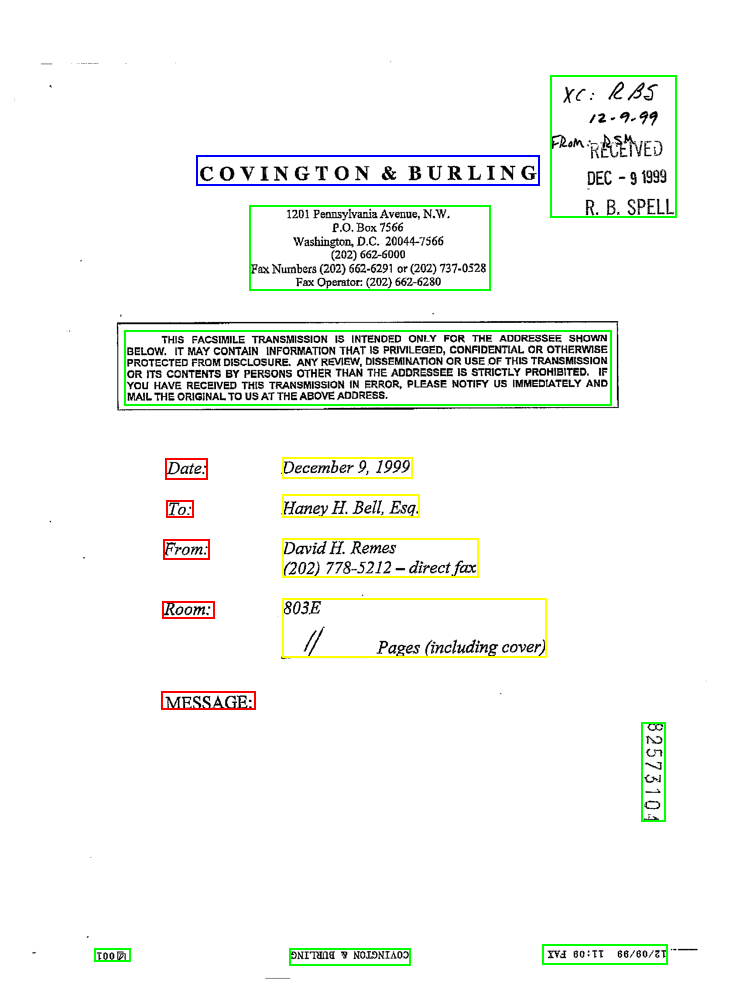

In [59]:
res